# Prognoos

In [ ]:
# Google drive kettal olevate andmete laadimine
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import gamma

import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interact_manual, interactive, fixed, IntSlider, FloatSlider, HBox, Layout, VBox
import cufflinks as cf
cf.go_offline()

from IPython.display import Markdown as md
%matplotlib inline

pd.options.display.max_rows = 112
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")

### Andmed 

* Suremuskordajad (elutabel)

* Rahvaarv 1-aastastes rühmades

* Sündimuse vanuskordajad 1-aastastes rühmades

* Kesmine vanus sünnil ja selle dispersioon

Allikad: [Human fertility DB](http://humanfertility.org)  ja [Human mortality DB](http://mortality.org)



In [ ]:
fpath = "/content/drive/My Drive/Colab Notebooks/Prognoos/"

# sündimuse vanuskordajad
asfr = pd.read_csv(os.path.join(fpath, "ESTasfrRR.txt") , delim_whitespace=True, header = 2)
asfr = asfr.apply(pd.to_numeric, errors = 'coerce')
asfr['Age'] = asfr['Age'].astype('Int64')

# elutabel
lt = pd.read_csv(os.path.join(fpath, "LT.txt"), delim_whitespace=True, header = 1)
lt.loc[lt['Age'] == '110+', 'Age'] = 110
lt = lt.apply(pd.to_numeric)
lt.loc[lt['qx'] == 0, 'qx'] = np.nan # puuduvad kordajad 

# rahvaarv
pop = pd.read_csv(os.path.join(fpath,"Population.txt"), delim_whitespace=True, header = 1)
pop.loc[pop['Age'] == '110+', 'Age'] = 110
pop = pop.apply(pd.to_numeric)

# keskmine laste saamise vanus
mab = pd.read_excel(os.path.join(fpath, 'MAB.xlsx'), header=2, sheet_name=1)

# MAB disp.
sd_mab = pd.read_csv(os.path.join(fpath, 'ESTsdmabRR.txt'), delim_whitespace=True, header = 2)

## Suremuskordajad

In [ ]:
# Eesti elutabelid 1959-2019, kogurahvastik
lt[lt['Year']==1993].head(3)

,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
3774,1993,0,0.01260,0.01247,0.12,100000,1247,98907,7407921,74.08
3775,1993,1,0.00104,0.00104,0.50,98753,102,98702,7309015,74.01
3776,1993,2,0.00104,0.00104,0.50,98651,103,98599,7210312,73.09


In [ ]:
def mx_ex_plot(x):
    fig, ax = plt.subplots(1,3)
    
    p = sns.lineplot(data=x, x='Age', y = 'qx', hue = 'Year', palette=["C0", "C1"], ax = ax[0])
    p.set_yscale('log')
    p.set_title("log-suremuskordaja vanuses ...")

    q = sns.lineplot(data=x, x='Age', y = 'ex', hue = 'Year', palette=["C0", "C1"], ax = ax[1])
    q.set_title("Oodatav eluiga vanuses ...")

    o = sns.lineplot(x=range(1958,2019), y = lt[lt['Age']==0]['ex'], ax = ax[2])
    o.set(xlabel='Aasta', ylabel='ex')
    o.set_title("Oodatav eluiga sünnimomendil 1959-2019")

@interact
def show_years(column='Year', Vali_Aasta = range(1959,2019,5)):
    z = lt.loc[lt['Year'].isin([Vali_Aasta, 2019])]
    mx_ex_plot(z)

interactive(children=(Text(value='Year', description='column'), Dropdown(description='Vali_Aasta', options=(19…

## Sündimuskordajad

1-aastase intervalliga sündimuse vanuskordaja. 

<center>

$_1 F_x$ = $\frac{_1 N_x}{_1 T_x}$

</center>

kus $N$ on 1959. aastal vanuses $x$ olnud naistele sündinud laste arv ja $T$ selles vanuses naiste poolt elatud inimaastad. 

Sündimuse summaarkordaja saadakse sündimuse vanuskordajate summeerimisel. 

$TFR$ = $\sum F_x$

Näiteks, allolevas tabelis:

* real 3 on toodud väärtus 0.00014, mis on saadud 1959. aastal 15-aastastele sündinud laste arvu jagamisega sel aastal selles vanuses elatud naiste inimaastatega (eeldusel, et ükski 15-aastane naine sel aastal ei surnud või emigreerunud, on inimaastate suurus võrdne selles vanuses olevate naiste arvuga).

* 1959. aastal oli 15-aastasi naisi 6958. Kui sel aastal sündis 15-aastaste kohta 1 laps, on tulemuseks 1/6958=0.000144. 


In [ ]:
asfr.head(5)

,Year,Age,ASFR
0,1959,<NA>,0.00000
1,1959,13,0.00000
2,1959,14,0.00014
3,1959,15,0.00014
4,1959,16,0.00145


In [ ]:
def tfr_plot(x):
    p = sns.lineplot(data=x, x="Age", y="ASFR", hue="Year", palette=["C0", "C1"])
    p.annotate(f"{min(x['Year'])} TFR: {round(sum(x['ASFR'][x['Year']!=2019]),2)}", xy=(40,0.11), size=16)
    p.annotate(f"{max(x['Year'])} TFR: {round(sum(x['ASFR'][x['Year']==2019]),2)}", xy=(40,0.09), size=16)

@interact
def show_articles_more_than(column=['Year'], 
                            Vali_Aasta=(1959, 2018, 1)):
    z = asfr.loc[asfr['Year'].isin([Vali_Aasta, 2019])]
    tfr_plot(z)

interactive(children=(Dropdown(description='column', options=('Year',), value='Year'), IntSlider(value=1988, d…

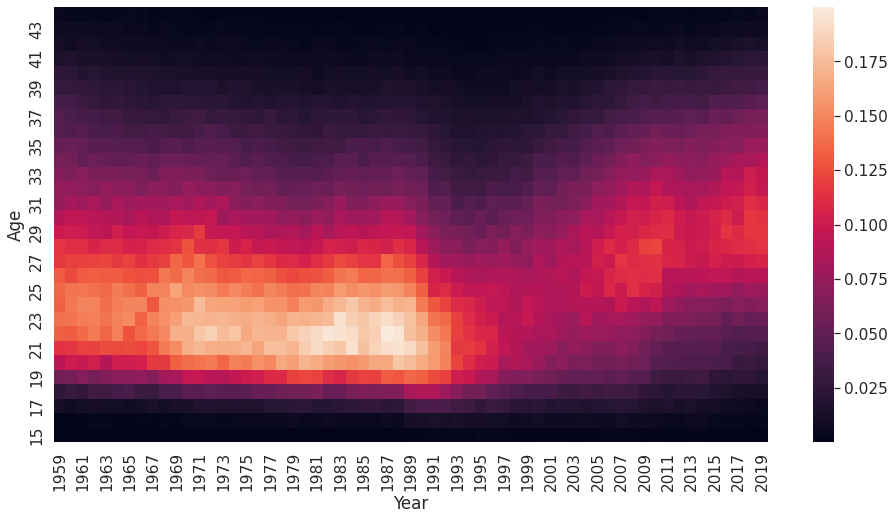

In [ ]:
sns.set(font_scale=1.4)
asfr2 = asfr.loc[asfr['Age'].isin(range(15, 45))].pivot("Age", "Year", "ASFR")
ax = sns.heatmap(asfr2)
ax.invert_yaxis()

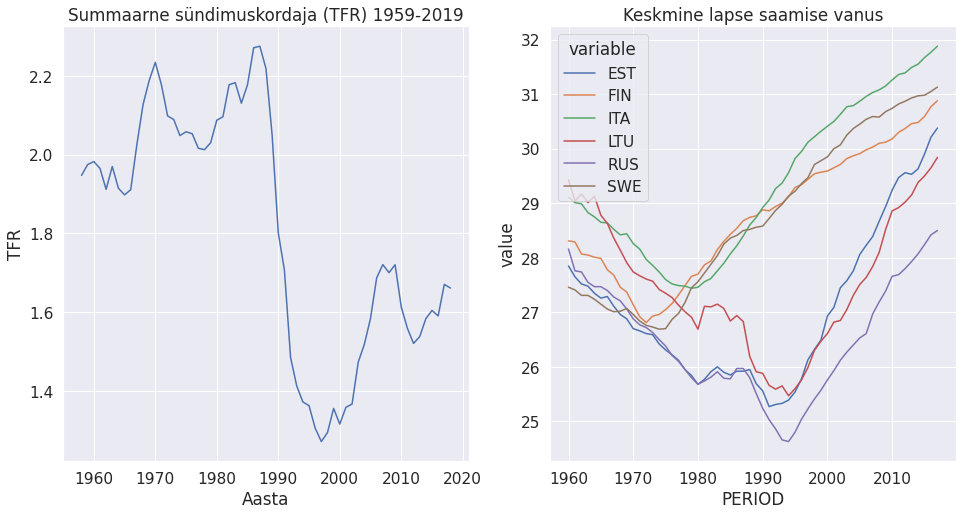

In [ ]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(1,2)

p = sns.lineplot(x=range(1958,2019), y = asfr.groupby(['Year'])['ASFR'].agg('sum'), ax = ax[0])
p.set(xlabel='Aasta', ylabel='TFR')
p.set_title("Summaarne sündimuskordaja (TFR) 1959-2019")

# keskmine sünnitamisvanus
mab_melt = pd.melt(mab, id_vars="PERIOD")
riigid = ['EST','FIN','ITA','SWE','RUS','LTU','LTV']

q = sns.lineplot(data=mab_melt[(mab_melt['variable'].isin(riigid)) & (mab_melt['PERIOD']<2018)], 
         x="PERIOD", y="value", hue="variable", ax = ax[1])
q.set_title("Keskmine lapse saamise vanus")
plt.show()

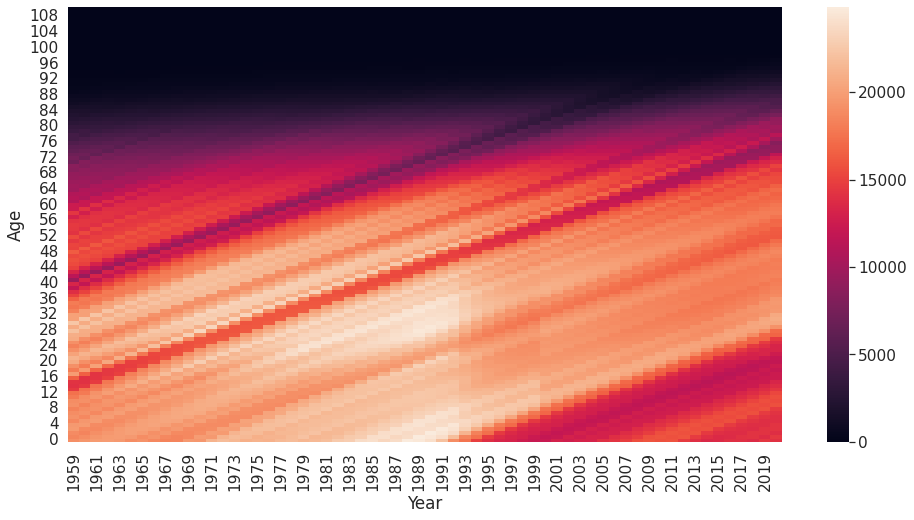

In [ ]:
sns.set(font_scale=1.4)
pop2 = pop.drop(['Female','Male'], axis=1)
pop2 = pop2.pivot("Age", "Year", "Total")
ax = sns.heatmap(pop2)
ax.invert_yaxis()

## Prognoos fikseeritud sündimus- ja suremuskordajatega

Märgistus:

$x_0, x_1 ... x_n$ - 1-aastased vanused, 0-110. 

$t_0, t_m$ - prognoositav periood $m$ kalendriaastat, prognoosi alustades $t_0$

$f_1, f_2 ... f_x$ - sündimuse vanuskordajad

$P_1, P_2 ... P_x$ - elulemuskordajad



[Leslie maatriks](https://en.wikipedia.org/wiki/Leslie_matrix)

Kolme vanusrühmaga rahvastik:

\begin{equation*}
\mathbf{L}=%
\begin{pmatrix}
f_{1} & f_{2} & f_{3} \\ 
P_{1} & 0  & 0 \\ 
0 & P_{3} & 0% 
\end{pmatrix}%
\end{equation*}


Teades rahvastiku algset vanusstruktuuri vektorit $x_0$ ja korrutades selle $\mathbf{L}$-ga (mille küljepikkus on sama, mis $x_0$), on tulemuseks $t_{0+1}$ nihkega vanusstruktuur $x_t$, mille esimene element on sündimuskordajate põhjal aasta jooksul sündinute arv. 

Võttes prognoosi pikkuseks üle 1 aasta, on prognoositava perioodi pikkus maatriksi $\mathbf{L}$ astendajaks, kuid korrutatakse endiselt algse rahvastiku struktuuriga.

\begin{equation*}
x_t = \mathbf{L}^t x_0
\end{equation*}

Maatriksi korrutamine vanusstruktuuri vektoriga:

\begin{equation*}
x_t =
\begin{pmatrix}
f_{1} & f_{2} & \cdots & f_{x} \\ 
P_{1} & 0 & \cdots & 0 \\ 
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & P_{x-1} & P_x
\end{pmatrix} 
\begin{pmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
         \end{pmatrix}
\end{equation*}

Prognoos aluseks olevad sündimuse vanuskordajad ja suremustõenäosused ei muutu, vaid rakenduvad ajas muutuvale vanusstruktuurile.


In [ ]:
# Algne rahvastiku struktuur 2019, sündimuse ja suremuse kordajad 2019 seisuga
# t0
algusaasta = 2015

lt19 = lt[lt['Year'].isin([algusaasta])]
pop19 = pop[pop['Year'].isin([algusaasta])]
asfr19 = asfr[asfr['Year'].isin([algusaasta])]

In [ ]:
# Struktuur x^0
N0 = pop19.Total[0:110].tolist()

# ellujäämistõenäosus igas vanuses, maatriksi diagonaalile
SUBD = lt19.Lx.iloc[1:].values/lt19.Lx.iloc[0:110].values
SUBD[-1:] = 0
Tx = lt19['Tx']

# Sündimuse vanuskordajad
Fx = [0]*12 + asfr19.ASFR.values.tolist() + [0]*55
k = (1/(1+1.05))*(lt19.Lx.iloc[0]/200000)
R1 = (k*(np.array(Fx[0:110]) + np.array(Fx[1:111]) * np.array(SUBD[0:110])))

L = np.zeros((109, 110))
np.fill_diagonal(L, SUBD[0:109])
L = np.vstack((R1,L))
L[109,109] = Tx.values[110]/Tx.values[109]

In [ ]:
# prognoosi funktsioon

def proj(m, t, n0):
    Nproj = []
    
    for i in range(0, t, 1):
        if i == 0:
            project = m
            Nproj = np.dot(project, n0)
        
        if i > 0:
            project = np.dot(project, m)
            Nproj = np.dot(project, n0)
                
    return Nproj

In [ ]:
def proj_graph(aeg, intervall):
  for i in range(1, aeg, intervall):
    y_data = proj(L, i, N0)
    p = sns.lineplot(x = range(1,111), y = y_data, label=str(i+algusaasta))
    p.annotate(round(sum(proj(L, i, N0))/1000_000, 2), xy=(i/2,6000-i*50), xytext=(i/2,6000-i*50))
    p.legend(title='Aasta')

@interact
def proj_sliders(
    Periood=(10, 100, 10),
    Intervall=(10,30,5)):
  proj_graph(Periood, Intervall)

interactive(children=(IntSlider(value=50, description='Periood', min=10, step=10), IntSlider(value=20, descrip…



---


## Prognoos muutuvate sündimuse vanuskordajatega

ASFR modelleerimise meetod: $\Gamma$-mudel, mille kolm varieeruvat parameetrit on TFR, keskmine sünnitamisvanus ja sünnitamisvanuse dispersioon. 

ASFR sõltub seega eeldustest:

* TFR tulevikus (tõuseb, langeb, jääb samaks)

* eeldatav keskmise sünnitamisvanuse tulevikus (tõuseb, langeb, jääb samaks)

* sünnitamisvanuse dispersioon tulevikus (kontsentreerub, hajub, jääb samaks)


$\Gamma$-mudeli väljundiks on sündimuskordaja $F$ vanuses $x$, tingimusel et $x$ on suurem kui parameeter $\alpha_4$.  


\begin{equation*}
F_x = \frac{1}{\Gamma (\alpha_3)} \alpha_1 \alpha_2^{\alpha_3}(x - \alpha_4)^{\alpha_3 - 1} exp(-\alpha_2(x - \alpha_4)); x \ge \alpha_4
\end{equation*}

Lihtsustamise mõttes võrdustatakse parameeter $\alpha_4$ 0-ga ning ülejäänud mudeli parameetrid esindavad järgmisi seoseid mudeli aluseks olevate eeldustega: 

* $\alpha_1 = TFR$

* $\alpha_2 = \frac{MAB}{StdAB^2}$

* $\alpha_3 = (\frac{MAB}{StdAB})^2$

Mudeli sisendiks on seega järgmised prognoosi perioodi pikkusega vektorid: 

* TFR - eeldatav sündimuse summaarkordaja

* MAB - eeldatav sünnitamisvanus

* StdAB - sünnitamisvanuse standarhälve 

In [ ]:
# Algandmed
# Rahvastiku struktuur, sündimuse ja suremuse kordajad valitud aasta seisuga

# mis aastast alustatakse prognoosi
algusaasta = 2019

lt19 = lt[lt['Year'].isin([algusaasta])]
pop19 = pop[pop['Year'].isin([algusaasta])]
N0 = pop19.Total[0:110].tolist()
asfr19 = asfr[asfr['Year'].isin([algusaasta])]

In [ ]:
# Gamma mudel

def asfr_gamma(aa):
  f_x_out = []

  # parameetrid
  a1 = aa['tfr'] 
  a2 = aa['mab']/(aa['sd_mab']**2)
  a3 = (aa['mab']/aa['sd_mab'])**2
  
  # vanusvahemik
  ages = list(range(12,50,1))

  for age in ages:
    v = (1/gamma(a3))*a1*(a2**a3)*(age**(a3-1))*np.exp(-a2*age)
    f_x_out.append(v)

  # 1-D array
  return np.array(f_x_out).ravel()

#### $\Gamma$-mudeli näidis

In [ ]:
def gamma_graph(tfr_stop, mab_stop, sd_mab_stop, periood):
  
  # algväärtused
  tfr_start,mab_start,sd_mab_start = round(sum(asfr['ASFR'][asfr['Year']==algusaasta]),2),\
  mab['EST'][mab['PERIOD']==algusaasta].iloc[0],\
  sd_mab['sdMAB'][sd_mab['Year']==algusaasta].iloc[0]

  d = pd.DataFrame(data={
      'tfr': np.linspace(tfr_start, tfr_stop, periood), 
     'mab': np.linspace(mab_start, mab_stop, periood),
     'sd_mab': np.linspace(sd_mab_start, sd_mab_stop, periood)
     })

  F = []
  F = np.array(d.apply(asfr_gamma, axis=1).tolist())

  D = pd.DataFrame(data=F[0:,0:],   
             index=range(pop19.iloc[0,0],periood+pop19.iloc[0,0],1),    
             columns=range(12,50,1)).reset_index().melt(
                 id_vars='index', var_name='Vanus', value_name='ASFR').rename(columns={'index': 'Aasta'})

  fig, ax = plt.subplots(1,2)

  p = sns.lineplot(data = D, x = "Vanus", y = "ASFR", hue="Aasta", ax=ax[0])

  D2 = D.pivot("Vanus", "Aasta", "ASFR")
  ax = sns.heatmap(D2, ax=ax[1])
  ax.invert_yaxis()
  
@interact
def gamma_sliders(
    TFR_stop=(1.2, 2.5, 0.1),
    MAB_stop=(20, 36, 1),
    sd_MAB_stop=(2, 6, 0.1),
    Periood=(1,10,1)):
  gamma_graph(TFR_stop, MAB_stop, sd_MAB_stop, Periood)

interactive(children=(FloatSlider(value=1.8, description='TFR_stop', max=2.5, min=1.2), IntSlider(value=28, de…



```
# This is formatted as code
```

### Leslie mudelprognoos muutuvate sündimuse vanuskordajatega

Märgistus 

$t_0, t_1 ... t_m$ - prognoositav periood $m$ aastat

$f_t$ - $\Gamma$-mudeli väljund aastal $t$ ehk vanusspetsiifiline sündimuskordaja 12-49 vanuses, vektor

$n_0, n_1 ... n_t$ - rahvastiku vanusstruktuur aastal $t$

\begin{equation*}
n_1 = \mathbf{L n_0}; f_1 \\
n_2 = \mathbf{L n_1}; f_2 \\
\vdots \\
n_t = \mathbf{L n_{t-1}}; f_t \\
\end{equation*}

In [ ]:
def project_dyn(lmat, pop, per):
  '''
  lmat - aasta L list; pop - algne rahvastiku struktuur; per - prognoositav periood
  '''

  N_0 = pop

  for i in range(1, per, 1):
    N_x = proj(lmat[(i-1)], 1, N_0)
    N_0 = N_x
  
  return N_0

In [ ]:
# Leslie maatriks
def leslie(fert):
  '''
  fert - ASFR, vektor; mort - standard elutabel, dataframe; 
  suremuse kordajad püsikoodeeritud, 'lt19' freim peab olema laetud
  '''
  mort = lt19
  
  SUBD = mort.Lx.iloc[1:].values/mort.Lx.iloc[0:110].values
  SUBD[-1:] = 0

  Tx = mort['Tx']

  Fx = [0]*12 + fert.values.tolist() + [0]*61
  k = (1/(1+1.05))*(mort.Lx.iloc[0]/200000)
  R1 = (k*(np.array(Fx[0:110]) + np.array(Fx[1:111]) * np.array(SUBD[0:110])))

  L = np.zeros((109, 110))
  np.fill_diagonal(L, SUBD[0:109])
  L = np.vstack((R1,L))
  L[109,109] = Tx.values[110]/Tx.values[109]

  return L

In [ ]:
# tuleviku TFR kõvera kordaja
def curve_add(TFR_muutus,Kiirus,periood,stsenaarium):
  a,b,c = TFR_muutus,5,Kiirus 
  p2 = periood//stsenaarium

  x = np.linspace(0,1,p2)
  y = a*np.exp(-b*np.exp(-c*x))
  y2 = [y[-1]]*(periood-p2)
  return np.add([*y,*y2],1)

In [ ]:
def gamma_graph_dyn(TFR_muutus, Kiirus, Stsenaarium, MAB_lõplik, sdAB_lõplik, Periood):
  
  mab_stop,sd_mab_stop,periood = MAB_lõplik,sdAB_lõplik,Periood
  
  # fikseeritud algväärtused
  tfr_start,mab_start,sd_mab_start = round(sum(asfr['ASFR'][asfr['Year']==algusaasta]),2),\
  mab['EST'][mab['PERIOD']==algusaasta].iloc[0],\
  sd_mab['sdMAB'][sd_mab['Year']==algusaasta].iloc[0]

  if periood==0:
    periood = periood + 1

  # sisendväärtused
  d = pd.DataFrame(data={
      # 'tfr': np.linspace(tfr_start, tfr_stop, periood), 
      'tfr': np.linspace(tfr_start, tfr_start, periood), 
     'mab': np.linspace(mab_start, mab_stop, periood),
     'sd_mab': np.linspace(sd_mab_start, sd_mab_stop, periood)
     })

  d['tfr'] = np.multiply(d['tfr'], curve_add(TFR_muutus,Kiirus,periood,Stsenaarium))
  
  if periood==0:
    tfr_last = round(d['tfr'][periood],2)
  if periood>0:
    tfr_last = round(d['tfr'][periood-1],2)

  # sündimuskordajad gamma funktsioonist
  F = []
  F = np.array(d.apply(asfr_gamma, axis=1).tolist())

  D = pd.DataFrame(data=F[0:,0:])

  # Leslie maatriksid, listidena
  LL = np.array(D.apply(leslie, axis=1))
  
  # dynaamiline projektsioon
  out = project_dyn(LL, N0, periood)

  p_size_start,p_size_end = round(sum(pop['Total'][pop['Year']==algusaasta])/1000_000,3),round(sum(out)/1000000, 3)

  p = sns.lineplot(x=range(1,111,1), y=out, linewidth=2.5)
  if periood<110:
    plt.plot([periood,periood], [5000,15000], color='red', ls='dotted')
  p.set(ylim=(0, 25_000))
  p.annotate(f"Lõpp {algusaasta + len(LL)}: \
  N {p_size_end} milj. TFR={tfr_last} \
  mAB={mab_stop} StdAB={sd_mab_stop}", xy=(0,1_000), size=18)
  p.annotate(f"Algus {algusaasta}: N {p_size_start} milj. \
  TFR = {tfr_start} mAB={mab_start} StdAB={sd_mab_start}", xy=(0,24_000), size=18)
  p.annotate(f"$x_0^t$: {round(out[0])}", xy=(80,22_000), color="red", size=16)
  p.annotate(f"TTSindeks: {round(sum(out[4:13])/(sum(out[54:63])),2)}", xy=(80,20_000), color="red", size=16)
  p.annotate(f"Dep.Ratio: {round((sum(out[:13])+sum(out[64:]))/(sum(out[14:63]))*100)}", xy=(80,18_000), \
             color="red", size=16)
  p.annotate(f"Pop.%: {round(p_size_end/p_size_start*100,1)}", xy=(80,16_000), color="red", size=16)

widget = interactive(gamma_graph_dyn,
                TFR_muutus = FloatSlider(min=-.5, max=.5, step=.1, value=0, orientation='horizontal'),
                Kiirus = FloatSlider(min=5, max=8, step=.1, value=5, orientation='horizontal'),
                Stsenaarium = IntSlider(min=1, max=3, step=1, value=1, orientation='horizontal'),
                MAB_lõplik=IntSlider(min=18, max=36, step=1, value=30, orientation='horizontal'),
                sdAB_lõplik=FloatSlider(min=5, max=6, step=.1, value=5.5, orientation='horizontal'),
                Periood=IntSlider(min=0, max=200, step=5, value=1, orientation='horizontal')
                )

controls = HBox(widget.children[:-1], layout = Layout(flex_flow='row wrap'))
output = widget.children[-1]
display(VBox([controls, output]))
widget.update()

In [ ]:
# tuleviku TFR muutuse kõvera kordaja
def curve_add(TFR_muutus,Kiirus,periood,stsenaarium):
  a,b,c = TFR_muutus,5,Kiirus 
  p2 = periood//stsenaarium

  x = np.linspace(0,1,p2)
  y = a*np.exp(-b*np.exp(-c*x))
  y2 = [y[-1]]*(periood-p2)
  return np.add([*y,*y2],1)

# joonis
def curve(a,c,stsenaarium):
  periood,a,b,c = 100,a,5,c
  p2 = periood//stsenaarium

  x = np.linspace(0,1,p2)
  y = a*np.exp(-b*np.exp(-c*x))
  y2 = [y[-1]]*(periood-p2)
  plt.plot(np.add([*y,*y2],1))

@interact
def sig_sliders(
    A=(-.5, .5, 0.1),
    C=(5, 8, .1),
    Stsenaarium=(1,3,1)):
  curve(A, C, Stsenaarium)

interactive(children=(FloatSlider(value=0.0, description='A', max=0.5, min=-0.5), FloatSlider(value=6.0, descr…